# Taller 1

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad se considera entregada para calificación cuando el *cuaderno* de jupyter notebook con extensión `.ipynb` se sube al espacio correspondiente en el aula de Bloque Neón. Ningún material adicional será revisado.

4. La solución del taller debe ser realizado en **parejas**. No se aceptaran talleres de individuales. 

## Criterios de evaluación.
Estos pueden ser consultados con más detalle en la rúbrica presente en Bloque Neón. A grandes rasgos, en cada uno de los incisos se evaluará su solución y se espera que sea igual a la estipulada en el enunciado. Adicionalmente, su calificación podrá ser penalizada por los siguientes items:

- Falta de seguimiento de las instrucciones.
- Código no-human readable. 
- Falta de una debida explicación y comentarios al código.

A continuación se listan los puntajes máximos para cada punto:
| **Punto** | **Puntaje Máximo** |
|:---------:|:------------------:|
|     1     |         0.5        |
|     2     |         2.5        |
|     3     |         2.0        |

Cada subnumeral del punto 2 y 3 vale lo mismo.

Este Taller evalúa los tópicos de la semana 1 a la 4 y tiene el valor de un 30% en su calificación final.

# Punto 1. Calentamiento

Construya una función que represente el lanzamiento de un dado de 6 caras. Lance el dado 1000 veces y guarde sus resultado en un vector. Calcule la media empírica y compare el resultado con el valor esperado de lanzar el mismo dado. 

In [8]:
import random
import numpy as np

def dice_simulate():
    number = random.randint(1,6)
    return(number)

# Media empírica
np.mean([dice_simulate() for i in range(1000)])

3.433

In [9]:
# Media teórica
np.sum([1/6*i for i in range(1, 7)])

3.5

## Punto 2. Construir el album de Panini

Ahora hagamos una simulación más compleja.

¿Cuántos sobres del album de Panini del Mundial necesito comprar para poder llenarlo? Supongamos lo siguiente:
- El album tiene 638 monas/laminitas.
- Todas las monas son igual de probables de encontrarse en los sobres.
- Un sobre puede tener monas/laminitas repetidas.
- Cada sobre trae 5 monas/laminas.
- No es posible intercambiar monas con otras personas.

Para responder esta pregunta podríamos tomar un camino [analítico](http://www.unige.ch/math/folks/velenik/Vulg/Paninimania.pdf) o de simulación computacional. En este caso, tomaremos el último.

### Punto 2.1.
Primero creemos **una función** que cree un album de Panini vacío. En este mundo abstracto, representamos un album como la lista de espacios vacías que nos faltan por llenar.

In [10]:
def estrenar_album(n = 638):
    # n es el número de monas/laminitas que tiene el album
    album = [i for i in range(1, n + 1)]
    return album

album_i = estrenar_album()
album_i

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

Para este punto su respuesta se debe ver de la siguiente manera:

```python
album_i = estrenar_album()
album_i
```

```
[1, 2, ..., 638]
```

### Punto 2.2

Ahora vamos a crear una función que sea abrir un sobre de monas/laminitas. Es decir, cree una función que escoja 5 números al azar entre 1 y 638, todos con igual probabilidad de ocurrencia y con reemplazo (es decir, en un sobre puede tener repetidos).

> Hint: La distribución uniforme le puede ser útil acá.

In [11]:
def abrir_sobre(n = 638):
    return np.random.randint(1, n + 1, size = 5)

In [12]:
sobre_j = abrir_sobre()
sobre_j

array([603, 295, 146, 609, 162])

Para este punto su respuesta se debe ver de la siguiente manera:

```python
sobre_j = abrir_sobre()
sobre_j
```

```
array([ 64, 377, 159, 619, 332])
```

### Punto 2.3.

Ahora definamos una función que sea pegar las monas/laminitas de nuestro paquete en nuestro album. 

Para hacer esto suponemos que nuestro `album_i` creado en el punto 2.1. es una lista con todas las monas/laminitas que hacen falta para llenar el album. En ese sentido, "pegar" las monas/laminitas en este consiste en eliminar los números que se tienen en el `sobre_j` del `album_i`.  

In [13]:
def pegar_monas(album, monas):
    album = list(set(album) - set(monas))
    return(album)

# Peguemos la mona 1 veamos que sucede
print(album_i[0:5])
album_i = pegar_monas(album = album_i, monas = [1])
print(album_i[0:5])

[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]


A modo de ejemplo, su código debe funcionar de la siguiente manera:

```python
# A modo de ejemplo, peguemos la mona 1

# Primero veamos las primeras 5 monas que nos faltan pegar
album_i[0:5]
```

```
[1, 2, 3, 4, 5]
``` 

```python
# Peguemos la mona 1 veamos que sucede
album_i = pegar_monas(album = album_i, monas = [1])
album_i[0:5]
```

```
[2, 3, 4, 5, 6]
``` 

Note que ya el elemento "1" (la lamina/mona "1") no hace parte del `album_i`. Su función debe funcionar entonces de la siguiente manera:

```python
album_i = pegar_monas(album = album_i, monas = sobre_j)
```


## Punto 3. Simulaciones
Cree una simulación que consista en saber cuántos sobres necesitamos para llenar un album como el descrito en el punto 2.

### Punto 3.1.

Para hacerlo apóyese de un `while loop` bajo la siguiente lógica:

```python
# Definimos condiciones iniciales
album_i = estrenar_album()

# Vamos a abrir sobres hasta que llenemos el album
while len(album_i) > 0:
    # Simulamos abrir un sobre
    
    # Simulamos pegar las laminas en el sobre
    
    # Llevamos el conteo de cuántos sobres llevamos
    n_sobres += 1    

# Tenemos que abrir n_sobres
n_sobres
```

In [14]:
# Definimos condiciones iniciales
album_i = estrenar_album()
n_sobres = 0

# Vamos a abrir sobres hasta que llenemos el album
while len(album_i) > 0:
    # Simulamos abrir un sobre
    sobre_j = abrir_sobre()
    # Simulamos pegar las laminas en el sobre
    album_i = pegar_monas(album = album_i, monas = sobre_j)
    # Llevamos el conteo de cuántos sobres llevamos
    n_sobres += 1    

# Tenemos que abrir
n_sobres

725

### Punto 3.2.
Note que cada vez que corre la solución anterior le da un resultado de número de sobres diferente. Esto se da por la naturaleza aleatoria del problema.

Simule el proceso anterior 1000 veces y guarde el número de sobres que es necesario comprar para llenar el album para cada simulación. 

In [15]:
# Importamos el paquete tqdm para ver el progreso de nuestro loop
from tqdm import tqdm

n_simulaciones = 1000

simulaciones = []
for s in tqdm(range(n_simulaciones)):
    # Definimos condiciones iniciales
    n_sobres = 0
    album_i = estrenar_album()
    # Vamos a abrir sobres hasta que llenemos el album
    while len(album_i) > 0:
        # Simulamos abrir un sobre
        sobre_j = abrir_sobre()
        # Simulamos pegar las laminas en el sobre
        album_i = pegar_monas(album = album_i, monas = sobre_j)
        # Llevamos el conteo de cuántos sobres llevamos
        n_sobres += 1  
    simulaciones.append(n_sobres)

100%|██████████| 1000/1000 [00:16<00:00, 61.59it/s]


Utilice el siguiente código para dibujar la distribución de los sobres necesarios para llenar el album.

```python
import matplotlib.pyplot as plt

plt.hist(simulaciones, bins = 30)
plt.title('Simulación de abrir 1000 sobres', size = 12)
plt.xlabel('Cantidad de sobres')
plt.ylabel('Cantidad')
```

Text(0, 0.5, 'Cantidad')

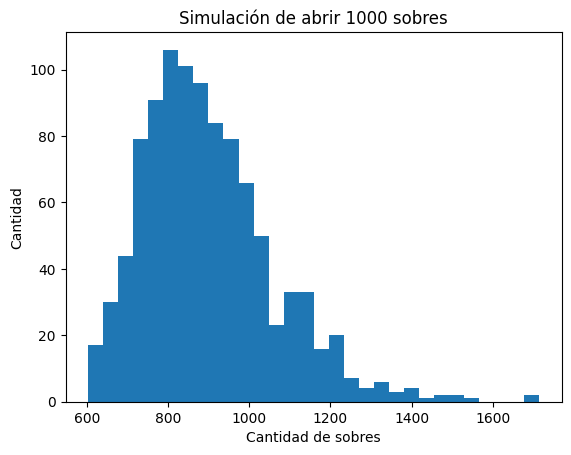

In [16]:
import matplotlib.pyplot as plt

plt.hist(simulaciones, bins = 30)
plt.title('Simulación de abrir 1000 sobres', size = 12)
plt.xlabel('Cantidad de sobres')
plt.ylabel('Cantidad')

In [17]:
# Construyamos algunos intervalos de confianza en donde capturemos el 95% de los escenarios
ic_inferior95 = np.percentile(simulaciones, 2.5)
ic_superior95 = np.percentile(simulaciones, 97.5)
ic_inferior50 = np.percentile(simulaciones, 25)
ic_superior50 = np.percentile(simulaciones, 75)

In [18]:
print("Con un 95% de confianza podemos decir que se necesitan abrir entre", np.round(ic_inferior95), 
      "y", np.round(ic_superior95), "sobres para llenar el album")

Con un 95% de confianza podemos decir que se necesitan abrir entre 657.0 y 1264.0 sobres para llenar el album


In [19]:
print("Tenemos un 50% de probabilidad de que tengamos que abrir al rededor de", np.median(simulaciones), "sobres para llenar el album")

Tenemos un 50% de probabilidad de que tengamos que abrir al rededor de 875.0 sobres para llenar el album


## Bono.
Este solo será valido si se responden todas las preguntas del bono y se muestra la solución.

1. Construya una Curva de Probabilidad Acumulada y grafiquela. 
2. Interprete la Curva.

In [20]:
# empirical Cumulative Distribution Function
def ecdf(simulaciones):
    # Número de simulaciones
    n = len(simulaciones)

    # Ordenamos las simulaciones de menos sobres a mayor cantidad de sobres
    x = np.sort(simulaciones)

    # Calculamos probabilidades
    y = []
    for i in x:
        y_i = np.mean([j < i for j in x])
        y.append(y_i)
    y = np.array(y)
    
    return x, y

In [21]:
x_norm, y_norm = ecdf(simulaciones)

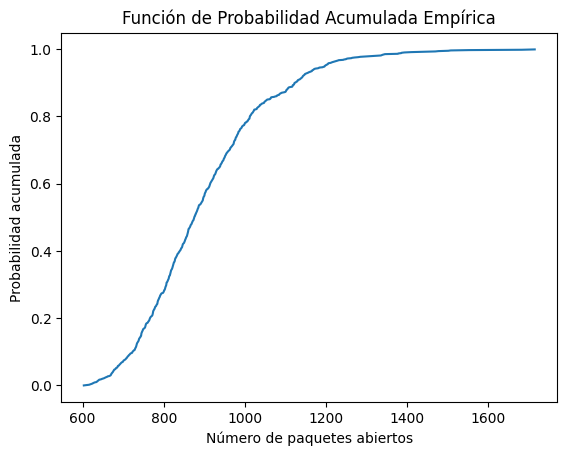

In [22]:
plt.plot(x_norm, y_norm)
plt.title('Función de Probabilidad Acumulada Empírica', size = 12);
plt.xlabel('Número de paquetes abiertos');
plt.ylabel('Probabilidad acumulada');